In [466]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
 
%matplotlib inline
import datetime 
import time
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


data1 = pd.read_csv("Data KP Gempa Bumi Wilayah Sumatera Selatan Dan Sekitarnya.csv")
data

,Day,Month,Years,Latitude,Longitude,Depth,Mag,Place,Jam,Menit,Detik
0,4,10,2022,-4.9967,104.2793,112.997,4.40,Kotabumi,20,14,43
1,1,10,2022,-3.8325,101.8353,60.652,4.90,Bengkulu,13,50,16
2,29,9,2022,-5.4541,102.6805,37.099,4.50,kotabumi,12,56,31
3,19,9,2022,-5.5071,102.8860,38.085,4.20,Pagar Alam,19,16,25
4,13,9,2022,-5.6133,104.1844,96.048,4.90,Kotabumi,11,18,3
...,...,...,...,...,...,...,...,...,...,...,...
2807,15,4,1916,-4.3380,102.5970,35.000,6.71,Bengkulu,12,31,43
2808,14,7,1914,-5.3050,102.5790,30.000,6.32,Pagar Alam,3,10,26
2809,25,6,1914,-4.0120,101.6380,35.000,7.55,Bengkulu,19,7,25
2810,3,6,1909,-2.7130,101.1880,35.000,7.58,Sungai Penuh,18,40,43


DATA PREPROCESSING DAN EDA 

In [467]:
data1.shape

(2812, 9)

In [468]:
data1.head(5)

,Day,Month,Years,Time,Latitude,Longitude,Depth,Mag,Place
0,4,10,2022,20:14:43,-4.9967,104.2793,112.997,4.4,Kotabumi
1,1,10,2022,13:50:16,-3.8325,101.8353,60.652,4.9,Bengkulu
2,29,9,2022,12:56:31,-5.4541,102.6805,37.099,4.5,kotabumi
3,19,9,2022,19:16:25,-5.5071,102.8860,38.085,4.2,Pagar Alam
4,13,9,2022,11:18:03,-5.6133,104.1844,96.048,4.9,Kotabumi


In [469]:
print(data1.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
2807    False
2808    False
2809    False
2810    False
2811    False
Length: 2812, dtype: bool


In [470]:
data1.duplicated().sum()

0

In [471]:
print(data1.dropna())

      Day  Month  Years      Time  Latitude  Longitude    Depth   Mag  \
0       4     10   2022  20:14:43   -4.9967   104.2793  112.997  4.40   
1       1     10   2022  13:50:16   -3.8325   101.8353   60.652  4.90   
2      29      9   2022  12:56:31   -5.4541   102.6805   37.099  4.50   
3      19      9   2022  19:16:25   -5.5071   102.8860   38.085  4.20   
4      13      9   2022  11:18:03   -5.6133   104.1844   96.048  4.90   
...   ...    ...    ...       ...       ...        ...      ...   ...   
2807   15      4   1916  12:31:43   -4.3380   102.5970   35.000  6.71   
2808   14      7   1914   3:10:26   -5.3050   102.5790   30.000  6.32   
2809   25      6   1914  19:07:25   -4.0120   101.6380   35.000  7.55   
2810    3      6   1909  18:40:43   -2.7130   101.1880   35.000  7.58   
2811   28     10   1906  15:50:18   -4.3450   101.9850   60.000  6.01   

             Place  
0         Kotabumi  
1         Bengkulu  
2        kotabumi   
3       Pagar Alam  
4         Kotabumi

In [472]:
data1.fillna(value=0)

,Day,Month,Years,Time,Latitude,Longitude,Depth,Mag,Place
0,4,10,2022,20:14:43,-4.9967,104.2793,112.997,4.40,Kotabumi
1,1,10,2022,13:50:16,-3.8325,101.8353,60.652,4.90,Bengkulu
2,29,9,2022,12:56:31,-5.4541,102.6805,37.099,4.50,kotabumi
3,19,9,2022,19:16:25,-5.5071,102.8860,38.085,4.20,Pagar Alam
4,13,9,2022,11:18:03,-5.6133,104.1844,96.048,4.90,Kotabumi
...,...,...,...,...,...,...,...,...,...
2807,15,4,1916,12:31:43,-4.3380,102.5970,35.000,6.71,Bengkulu
2808,14,7,1914,3:10:26,-5.3050,102.5790,30.000,6.32,Pagar Alam
2809,25,6,1914,19:07:25,-4.0120,101.6380,35.000,7.55,Bengkulu
2810,3,6,1909,18:40:43,-2.7130,101.1880,35.000,7.58,Sungai Penuh


In [473]:
pd.isnull(data1)

,Day,Month,Years,Time,Latitude,Longitude,Depth,Mag,Place
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2807,False,False,False,False,False,False,False,False,False
2808,False,False,False,False,False,False,False,False,False
2809,False,False,False,False,False,False,False,False,False
2810,False,False,False,False,False,False,False,False,False


In [474]:
data1.describe()

,Day,Month,Years,Latitude,Longitude,Depth,Mag
count,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000,2812.000000
mean,15.316501,6.643670,2002.085349,-4.316166,102.317585,57.773326,4.741970
std,8.613325,3.204239,14.592112,0.957706,0.953301,48.765237,0.530978
min,1.000000,1.000000,1906.000000,-5.660000,100.791000,3.900000,3.500000
25%,8.000000,4.000000,1998.000000,-5.031700,101.639850,33.000000,4.400000
50%,15.000000,6.000000,2004.000000,-4.494000,102.248000,35.000000,4.700000
75%,22.000000,9.000000,2011.000000,-3.758525,102.814000,64.415000,5.000000
max,31.000000,12.000000,2022.000000,-0.972000,106.225000,604.700000,8.400000


In [475]:
data1['Mag'].unique()

array([4.4 , 4.9 , 4.5 , 4.2 , 4.8 , 5.4 , 5.1 , 5.  , 4.7 , 6.2 , 4.  ,
       4.3 , 5.3 , 5.2 , 5.8 , 4.6 , 4.1 , 5.5 , 6.9 , 6.8 , 5.6 , 5.9 ,
       5.7 , 6.4 , 6.  , 6.5 , 6.6 , 6.3 , 3.9 , 3.8 , 3.7 , 3.5 , 7.9 ,
       8.4 , 7.3 , 3.6 , 7.4 , 6.7 , 6.1 , 7.  , 5.54, 5.62, 5.97, 5.67,
       5.53, 5.51, 7.02, 5.58, 5.42, 5.85, 5.55, 5.63, 5.56, 5.93, 6.07,
       6.56, 6.23, 5.73, 6.33, 6.28, 6.29, 6.64, 6.05, 7.38, 5.79, 6.02,
       6.13, 6.19, 5.45, 6.31, 5.77, 7.52, 5.99, 5.88, 7.34, 6.45, 6.37,
       6.14, 6.68, 6.65, 6.16, 6.54, 6.35, 6.71, 6.32, 7.55, 7.58, 6.01])

In [476]:
import warnings

warnings.filterwarnings('ignore')

FEATURE ENGINEERING

In [477]:
data1.head()

,Day,Month,Years,Time,Latitude,Longitude,Depth,Mag,Place
0,4,10,2022,20:14:43,-4.9967,104.2793,112.997,4.4,Kotabumi
1,1,10,2022,13:50:16,-3.8325,101.8353,60.652,4.9,Bengkulu
2,29,9,2022,12:56:31,-5.4541,102.6805,37.099,4.5,kotabumi
3,19,9,2022,19:16:25,-5.5071,102.8860,38.085,4.2,Pagar Alam
4,13,9,2022,11:18:03,-5.6133,104.1844,96.048,4.9,Kotabumi


In [478]:
data1['Time']

0       20:14:43
1       13:50:16
2       12:56:31
3       19:16:25
4       11:18:03
          ...   
2807    12:31:43
2808     3:10:26
2809    19:07:25
2810    18:40:43
2811    15:50:18
Name: Time, Length: 2812, dtype: object

In [479]:
data1 = data1[['Day','Month','Years','Time', 'Latitude', 'Longitude', 'Depth', 'Mag','Place']]
data1

,Day,Month,Years,Time,Latitude,Longitude,Depth,Mag,Place
0,4,10,2022,20:14:43,-4.9967,104.2793,112.997,4.40,Kotabumi
1,1,10,2022,13:50:16,-3.8325,101.8353,60.652,4.90,Bengkulu
2,29,9,2022,12:56:31,-5.4541,102.6805,37.099,4.50,kotabumi
3,19,9,2022,19:16:25,-5.5071,102.8860,38.085,4.20,Pagar Alam
4,13,9,2022,11:18:03,-5.6133,104.1844,96.048,4.90,Kotabumi
...,...,...,...,...,...,...,...,...,...
2807,15,4,1916,12:31:43,-4.3380,102.5970,35.000,6.71,Bengkulu
2808,14,7,1914,3:10:26,-5.3050,102.5790,30.000,6.32,Pagar Alam
2809,25,6,1914,19:07:25,-4.0120,101.6380,35.000,7.55,Bengkulu
2810,3,6,1909,18:40:43,-2.7130,101.1880,35.000,7.58,Sungai Penuh


In [480]:
minutes = []
hours = []
seconds = []

for t in data1.Time:
    t  = t.split(":")
    minutes.append(t[1])
    hours.append(t[0])
    seconds.append(t[2])

In [481]:
data1['Time'] = pd.to_datetime(data1['Time'])

In [482]:
data1['Jam'] = data1['Time'].dt.hour
data1['Menit'] = data1['Time'].dt.minute
data1['Detik'] = data1['Time'].dt.second


In [483]:
data1.drop(['Time'], axis=1, inplace=True)
data1.head()


,Day,Month,Years,Latitude,Longitude,Depth,Mag,Place,Jam,Menit,Detik
0,4,10,2022,-4.9967,104.2793,112.997,4.4,Kotabumi,20,14,43
1,1,10,2022,-3.8325,101.8353,60.652,4.9,Bengkulu,13,50,16
2,29,9,2022,-5.4541,102.6805,37.099,4.5,kotabumi,12,56,31
3,19,9,2022,-5.5071,102.8860,38.085,4.2,Pagar Alam,19,16,25
4,13,9,2022,-5.6133,104.1844,96.048,4.9,Kotabumi,11,18,3


In [484]:
data1['Years']


0       2022
1       2022
2       2022
3       2022
4       2022
        ... 
2807    1916
2808    1914
2809    1914
2810    1909
2811    1906
Name: Years, Length: 2812, dtype: int64

VISUALISASI

<function matplotlib.pyplot.show(close=None, block=None)>

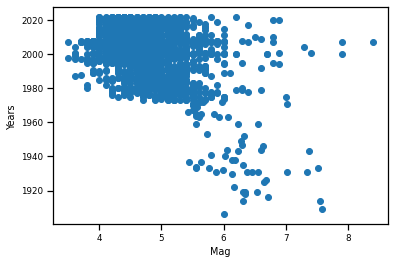

In [485]:
X = data1['Mag']
Y = data1['Years']
plt.scatter(X,Y)
plt.xlabel("Mag")
plt.ylabel('Years')

plt.show

Text(0.5, 1.0, 'Perbandingan kedalaman gempa bumi di setiap tahun ')

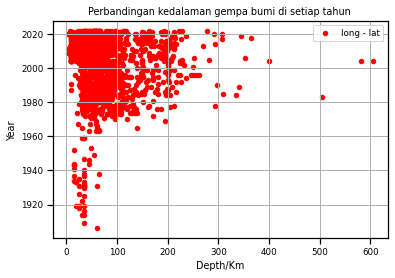

In [486]:
#plt.scatter(d.long, d.lat, grid=True, label= "latitude - duration", color="red")
data1.plot(kind= "scatter", x= "Depth", y= "Years", grid=True, label= "long - lat", color="red")
plt.legend()
plt.xlabel("Depth/Km")
plt.ylabel("Year")
plt.title("Perbandingan kedalaman gempa bumi di setiap tahun ")


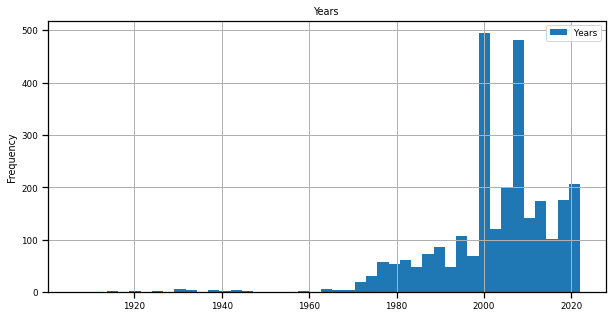

In [487]:
data1.Years.plot(kind="hist", grid= True, figsize= (10,5), bins= (45))
plt.title("Years")
plt.legend()
plt.show()

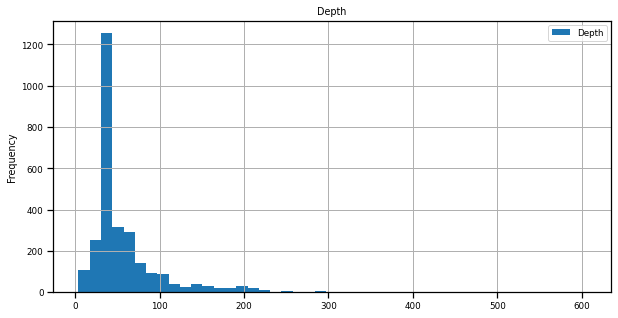

In [488]:
data1.Depth.plot(kind="hist", grid= True, figsize= (10,5), bins= (45))
plt.title("Depth")
plt.legend()
plt.show()

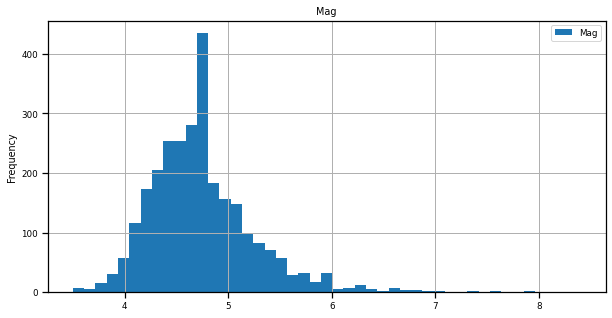

In [489]:
data1.Mag.plot(kind="hist", grid= True, figsize= (10,5), bins= (45))
plt.title("Mag")
plt.legend()
plt.show()

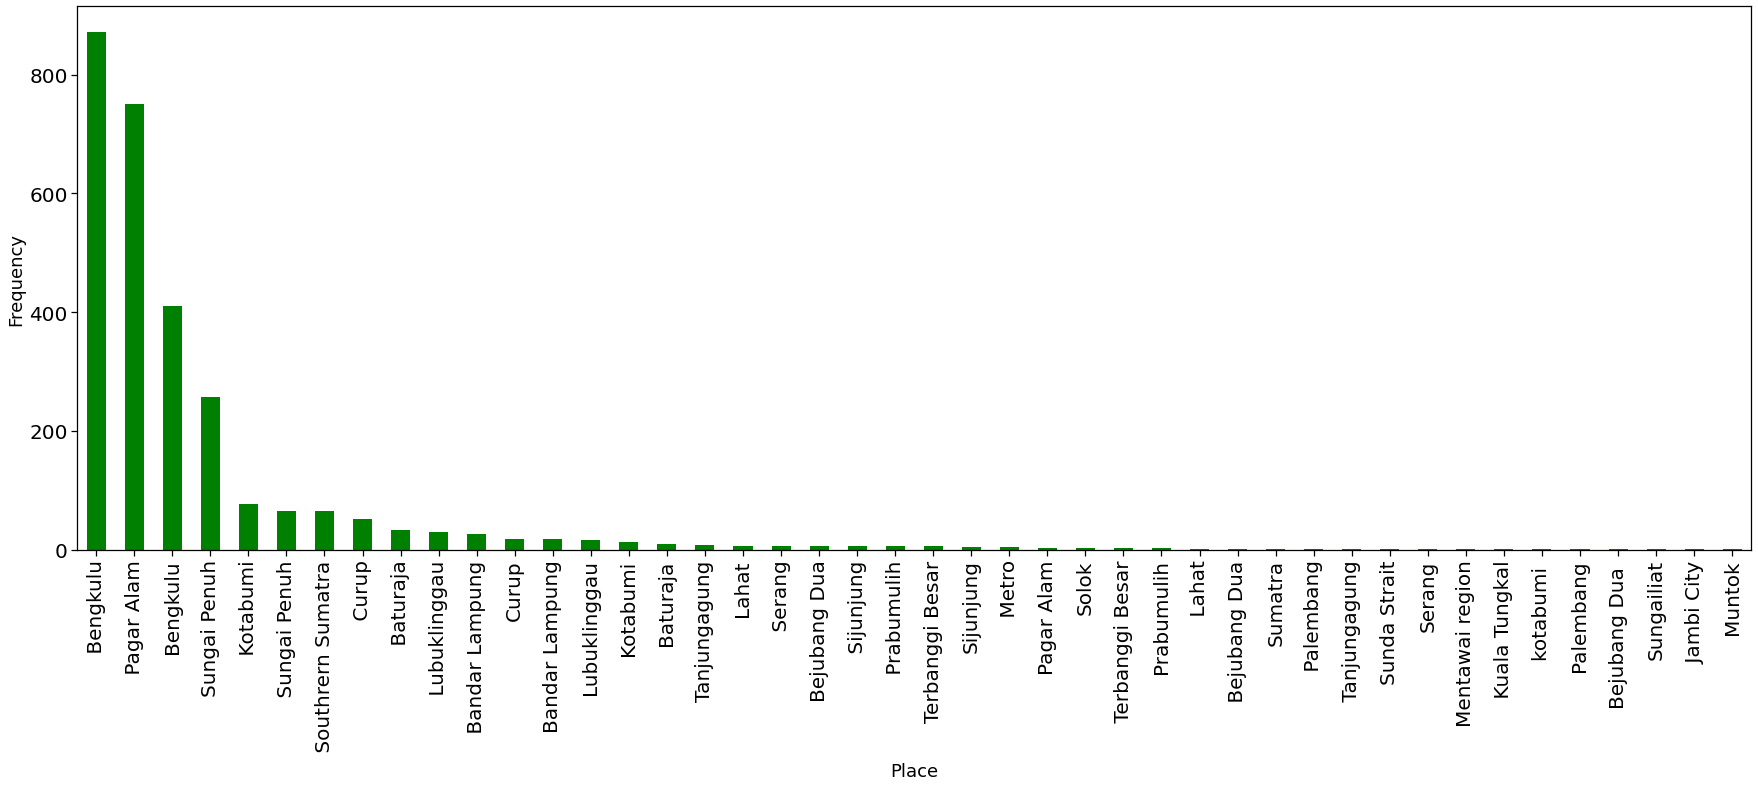

In [490]:
data1.Place.value_counts().plot(kind = "bar" , color = "green" , figsize = (30,10),fontsize = 20)

plt.xlabel("Place",fontsize=18,color="black")
plt.ylabel("Frequency",fontsize=18,color="black")
plt.show()

<AxesSubplot:>

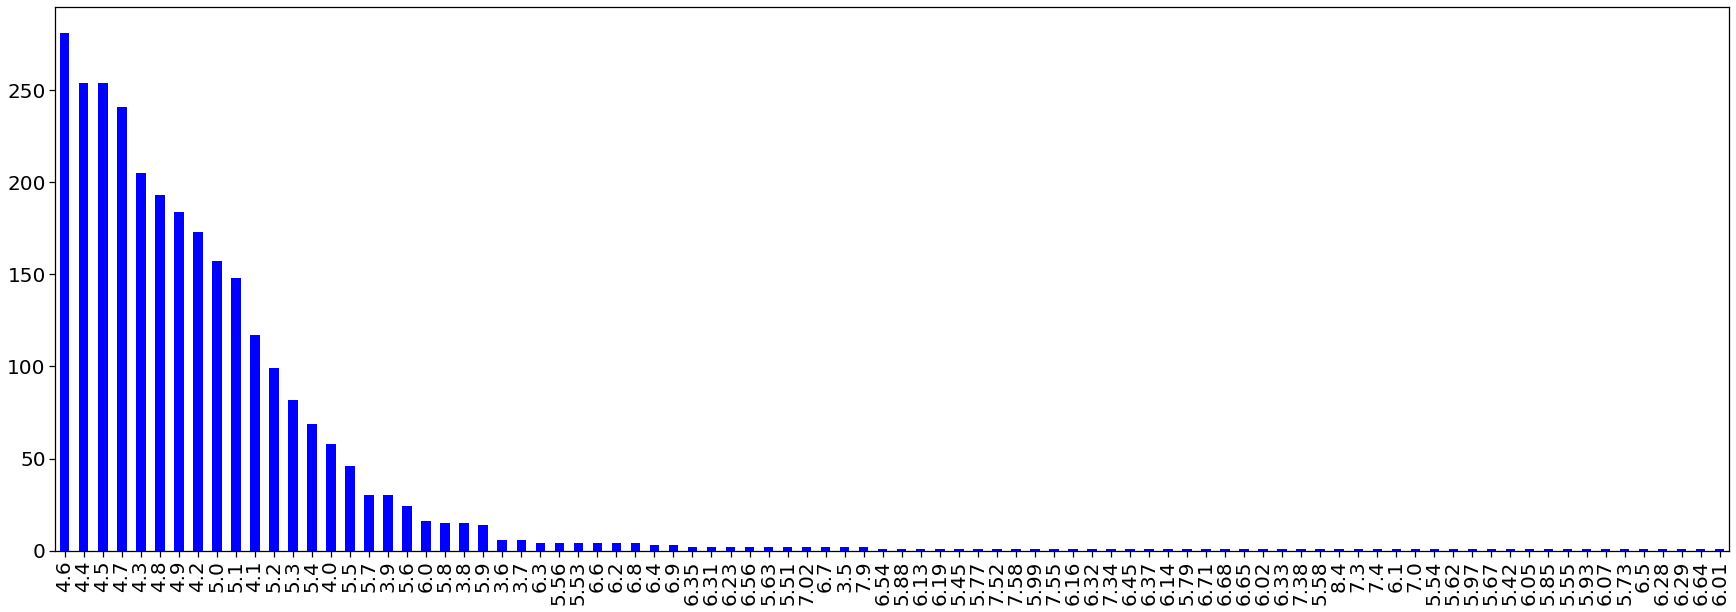

In [491]:
data1.Mag.value_counts().plot(kind = "bar" , color = "blue" , figsize = (30,10),fontsize = 20)

<AxesSubplot:>

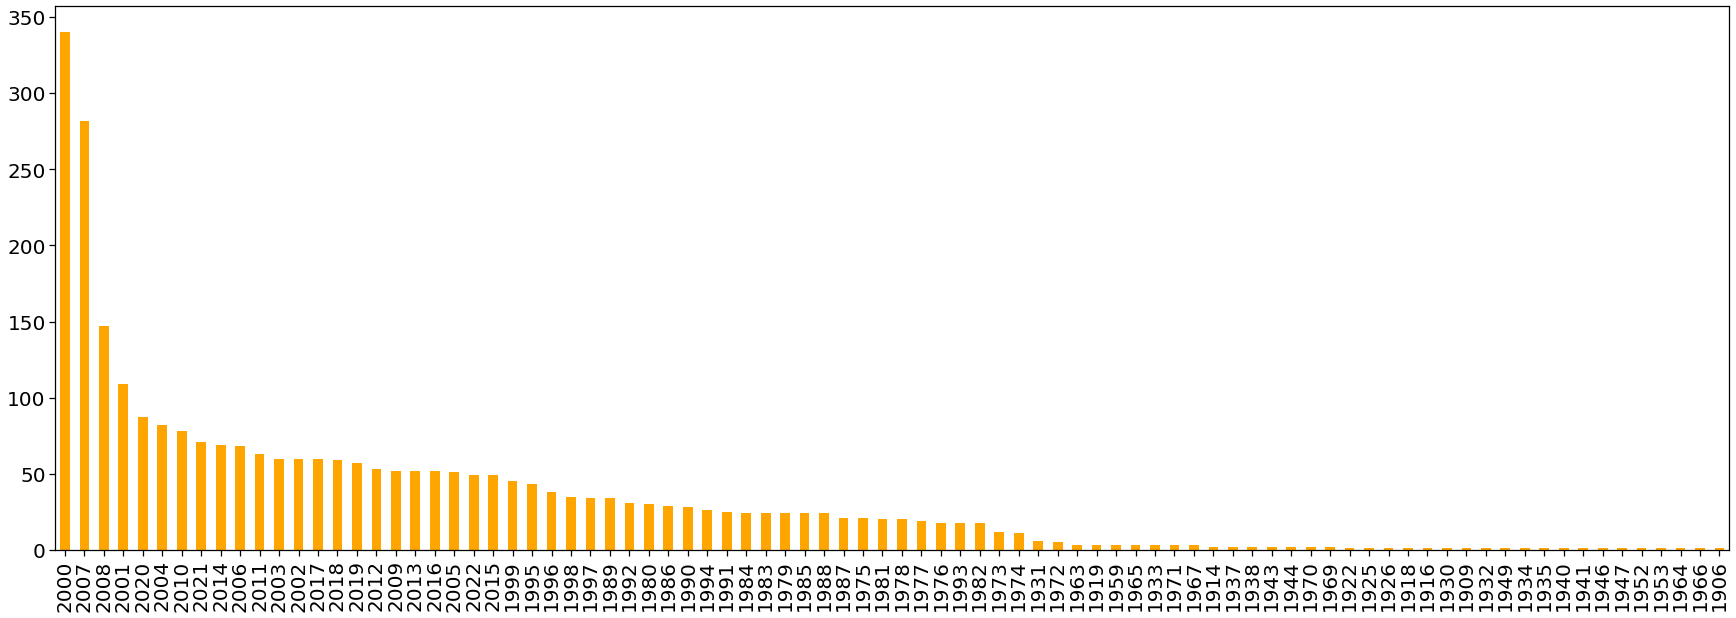

In [492]:
data1.Years.value_counts().plot(kind = "bar" , color = "orange" , figsize = (30,10),fontsize = 20)

<AxesSubplot:>

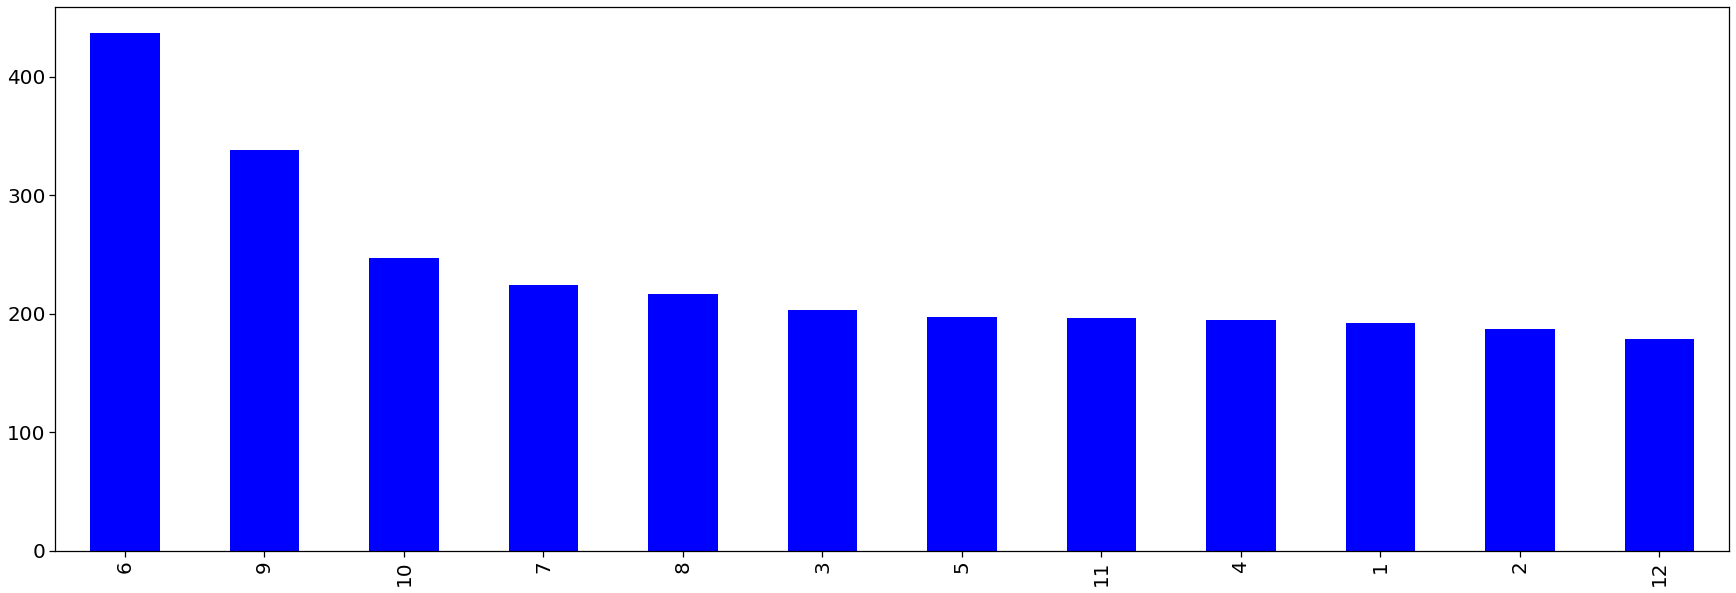

In [493]:
data1.Month.value_counts().plot(kind = "bar" , color = "blue" , figsize = (30,10),fontsize = 20)

<AxesSubplot:>

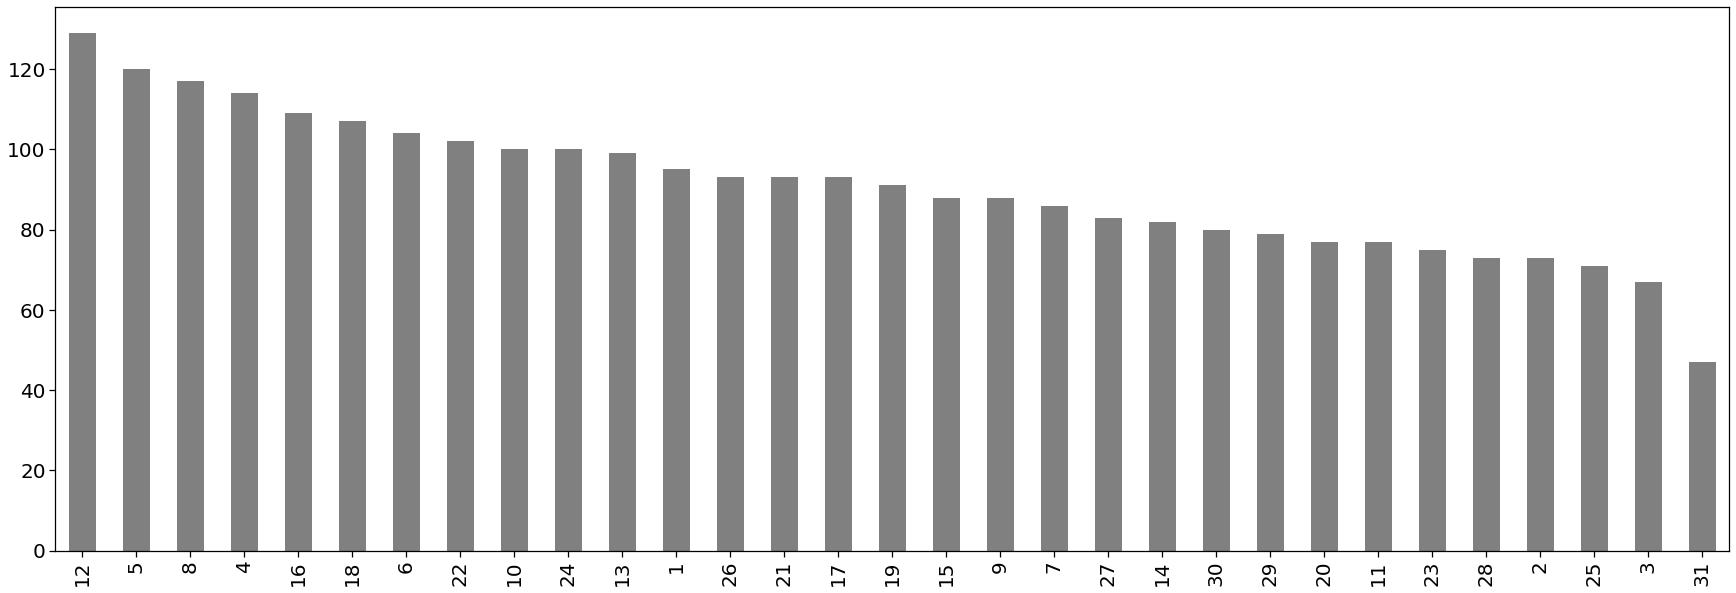

In [494]:
data1.Day.value_counts().plot(kind = "bar" , color = "grey" , figsize = (30,10),fontsize = 20)

In [495]:
data1.head()

,Day,Month,Years,Latitude,Longitude,Depth,Mag,Place,Jam,Menit,Detik
0,4,10,2022,-4.9967,104.2793,112.997,4.4,Kotabumi,20,14,43
1,1,10,2022,-3.8325,101.8353,60.652,4.9,Bengkulu,13,50,16
2,29,9,2022,-5.4541,102.6805,37.099,4.5,kotabumi,12,56,31
3,19,9,2022,-5.5071,102.8860,38.085,4.2,Pagar Alam,19,16,25
4,13,9,2022,-5.6133,104.1844,96.048,4.9,Kotabumi,11,18,3


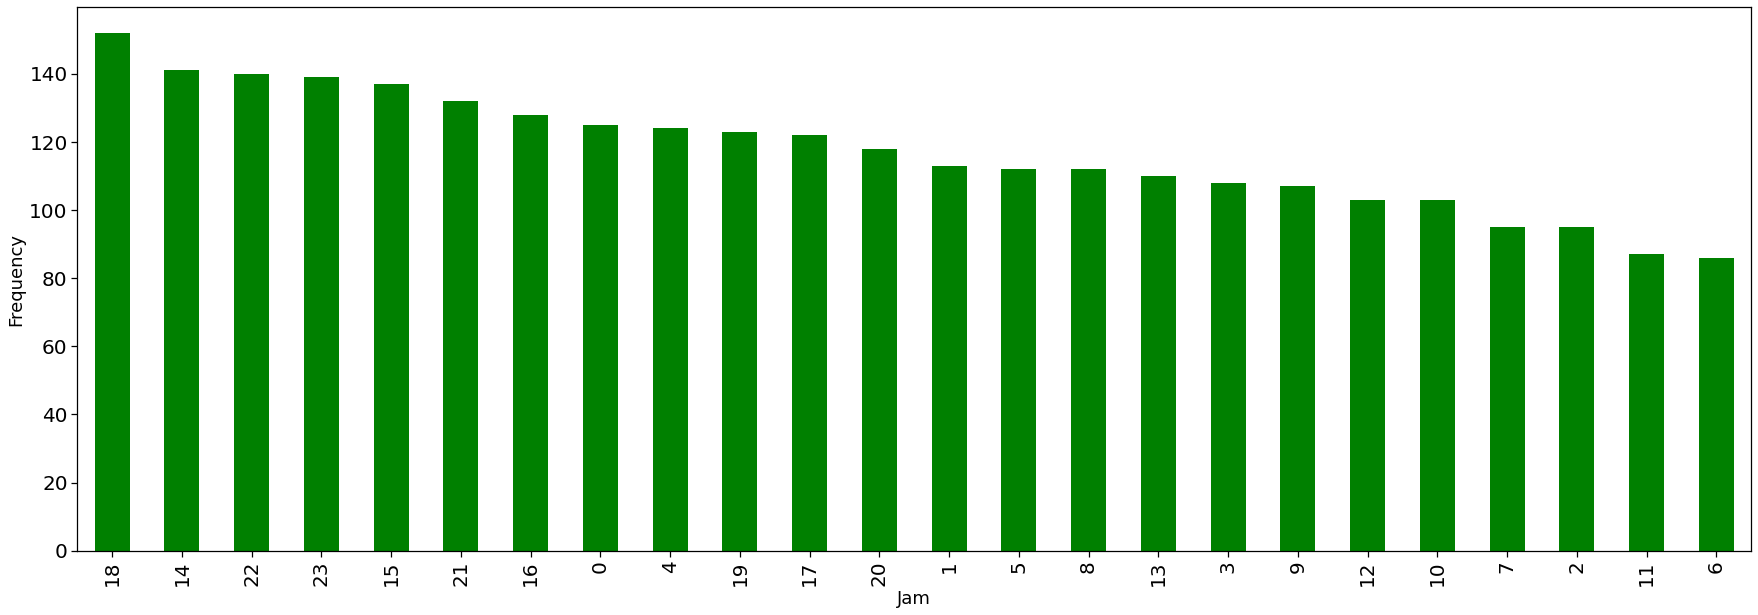

In [496]:
data1.Jam.value_counts().plot(kind = "bar" , color = "green" , figsize = (30,10),fontsize = 20)

plt.xlabel("Jam",fontsize=18,color="black")
plt.ylabel("Frequency",fontsize=18,color="black")
plt.show()

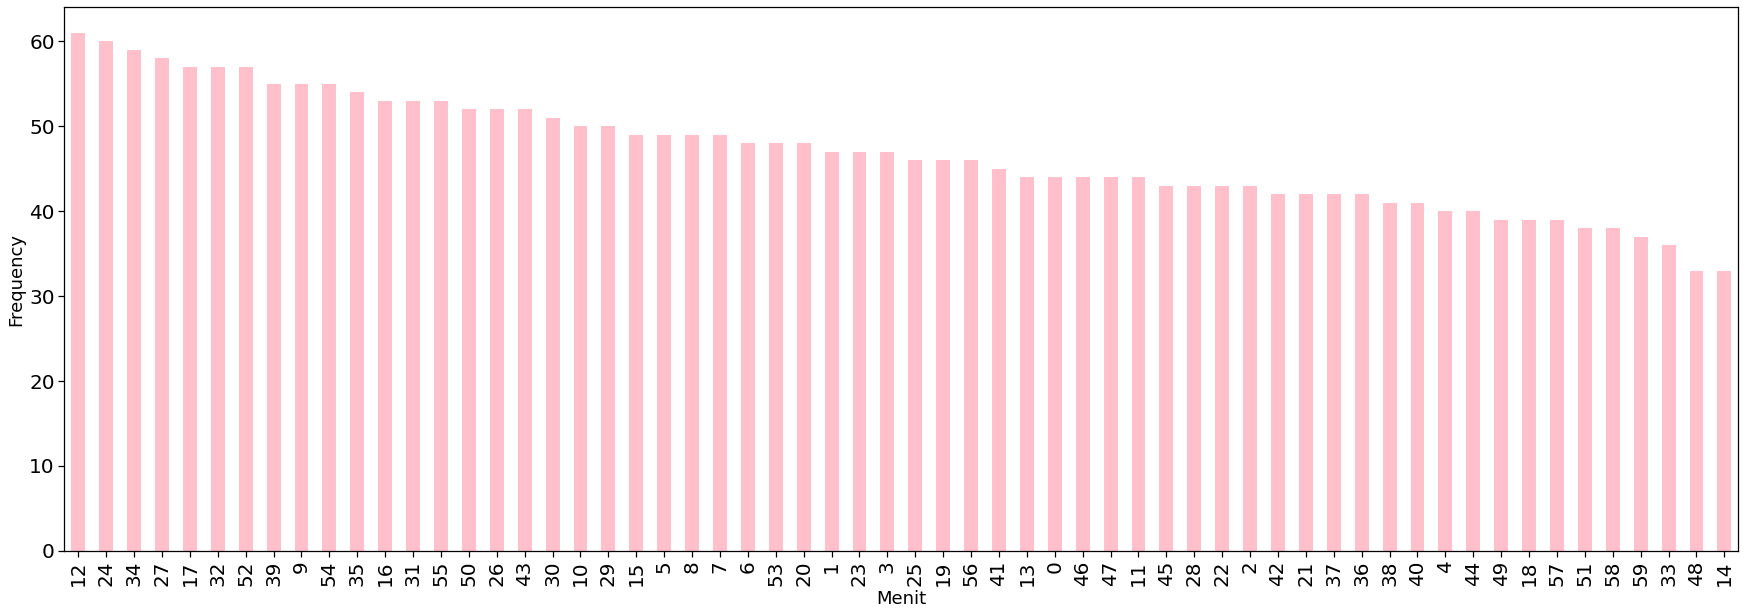

In [497]:
data1.Menit.value_counts().plot(kind = "bar" , color = "pink" , figsize = (30,10),fontsize = 20)

plt.xlabel("Menit",fontsize=18,color="black")
plt.ylabel("Frequency",fontsize=18,color="black")
plt.show()

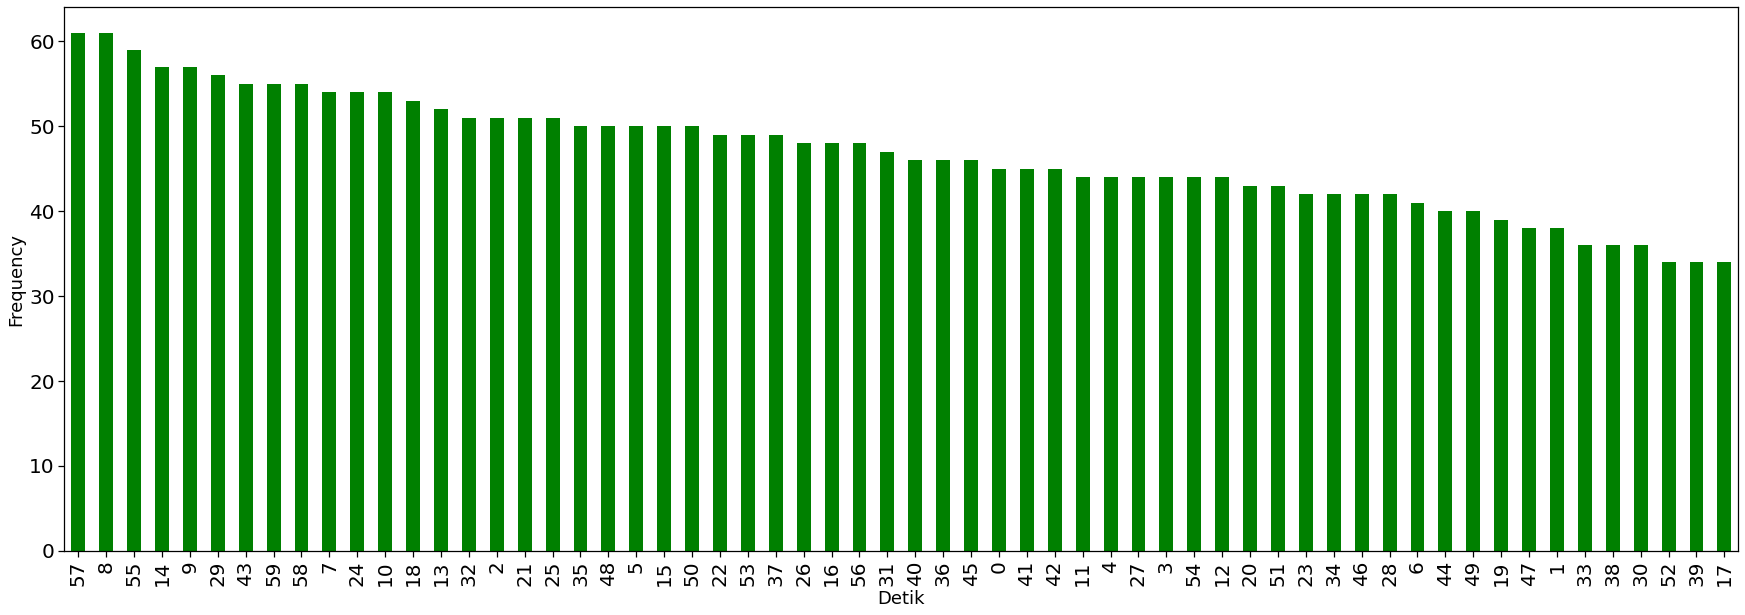

In [498]:
data1.Detik.value_counts().plot(kind = "bar" , color = "green" , figsize = (30,10),fontsize = 20)

plt.xlabel("Detik",fontsize=18,color="black")
plt.ylabel("Frequency",fontsize=18,color="black")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

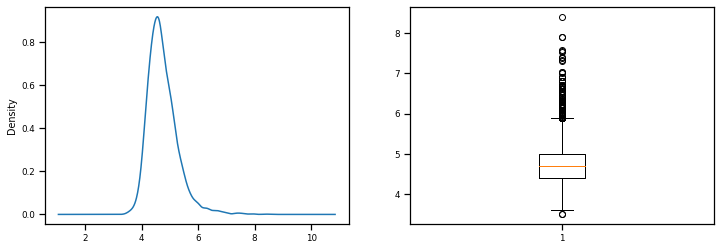

In [499]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
data1['Mag'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(data['Mag'])
plt.show

<AxesSubplot:xlabel='Mag'>

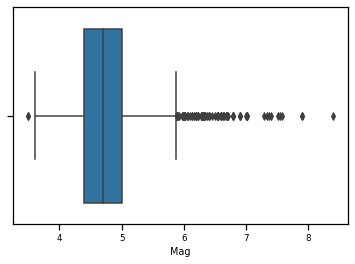

In [500]:
sns.boxplot(x=data['Mag'])

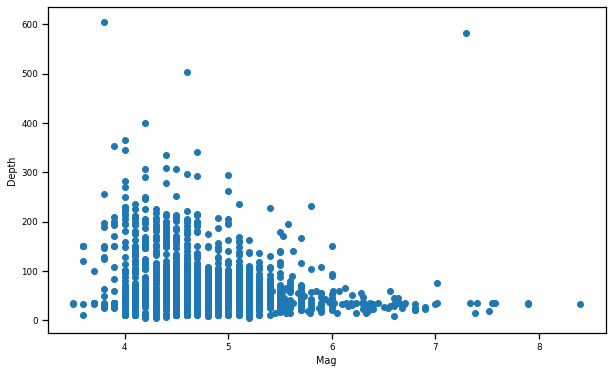

In [501]:
fig, ax =plt.subplots(figsize=(10,6))
ax.scatter(data['Mag'],data['Depth'])
ax.set_xlabel('Mag')
ax.set_ylabel('Depth')
plt.show()

In [502]:
data1[['Mag','Depth']].corr()

,Mag,Depth
Mag,1.000000,-0.134768
Depth,-0.134768,1.000000


In [503]:
data1[['Depth','Longitude']].corr()

,Depth,Longitude
Depth,1.000000,0.333538
Longitude,0.333538,1.000000


In [504]:
data1[['Depth','Latitude']].corr()

,Depth,Latitude
Depth,1.000000,0.330352
Latitude,0.330352,1.000000


# LOGISTIC REGRESSION 

In [505]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [506]:
data2 = pd.read_csv("Data KP Gempa Bumi Wilayah Sumatera Selatan Dan Sekitarnya.csv")


In [507]:
data2

,Day,Month,Years,Time,Latitude,Longitude,Depth,Mag,Place
0,4,10,2022,20:14:43,-4.9967,104.2793,112.997,4.40,Kotabumi
1,1,10,2022,13:50:16,-3.8325,101.8353,60.652,4.90,Bengkulu
2,29,9,2022,12:56:31,-5.4541,102.6805,37.099,4.50,kotabumi
3,19,9,2022,19:16:25,-5.5071,102.8860,38.085,4.20,Pagar Alam
4,13,9,2022,11:18:03,-5.6133,104.1844,96.048,4.90,Kotabumi
...,...,...,...,...,...,...,...,...,...
2807,15,4,1916,12:31:43,-4.3380,102.5970,35.000,6.71,Bengkulu
2808,14,7,1914,3:10:26,-5.3050,102.5790,30.000,6.32,Pagar Alam
2809,25,6,1914,19:07:25,-4.0120,101.6380,35.000,7.55,Bengkulu
2810,3,6,1909,18:40:43,-2.7130,101.1880,35.000,7.58,Sungai Penuh


In [508]:
corr =data2.corr()


<AxesSubplot:>

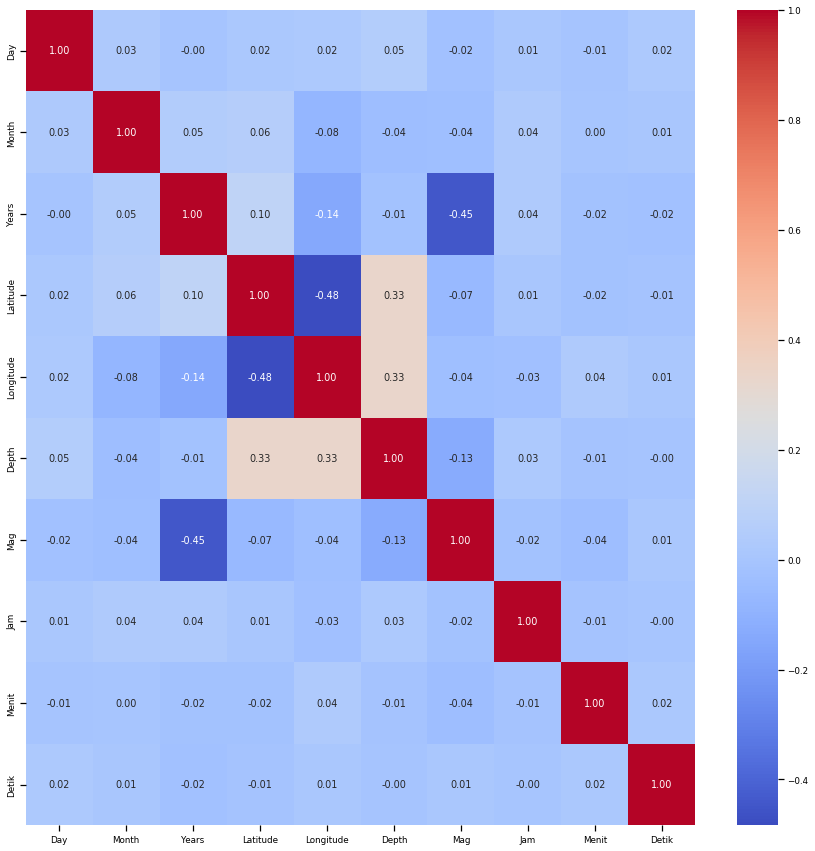

In [509]:
import matplotlib.pyplot as plt
# Heatmap (correlation)
sns.set_context('notebook', font_scale=0.8)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(ax=ax, data=data.corr(), annot=True, fmt= '.2f', cmap='coolwarm')

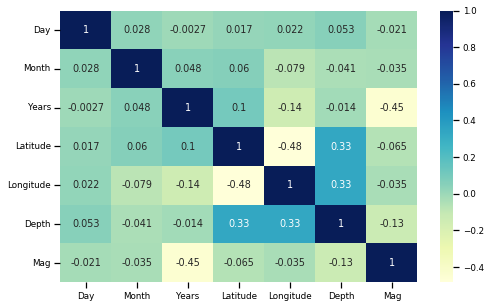

In [510]:
plt.subplots(figsize=(8, 5))
sns.heatmap(corr, annot=True,cmap ='YlGnBu')

plt.show()

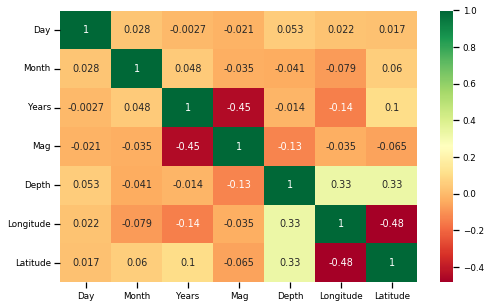

In [511]:
cols = ['Day', 'Month', 'Years', 'Mag', 'Place', 
                     'Depth', 'Longitude', 'Latitude']
X = data2[cols]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [512]:
minutes = []
hours = []
seconds = []

for t in data2.Time:
    t  = t.split(":")
    minutes.append(t[1])
    hours.append(t[0])
    seconds.append(t[2])

In [513]:
data2['Time'] = pd.to_datetime(data2['Time'])

In [514]:
data2['Jam'] = data2['Time'].dt.hour
data2['Menit'] = data2['Time'].dt.minute
data2['Detik'] = data2['Time'].dt.second

In [515]:
data2.drop(['Time'], axis=1, inplace=True)
data2.head()


,Day,Month,Years,Latitude,Longitude,Depth,Mag,Place,Jam,Menit,Detik
0,4,10,2022,-4.9967,104.2793,112.997,4.4,Kotabumi,20,14,43
1,1,10,2022,-3.8325,101.8353,60.652,4.9,Bengkulu,13,50,16
2,29,9,2022,-5.4541,102.6805,37.099,4.5,kotabumi,12,56,31
3,19,9,2022,-5.5071,102.8860,38.085,4.2,Pagar Alam,19,16,25
4,13,9,2022,-5.6133,104.1844,96.048,4.9,Kotabumi,11,18,3


In [516]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

X1 = data2[['Latitude', 'Longitude','Depth','Mag']]
y1 = data2[['Place']]

# Build a logreg and compute the feature importances
model = LogisticRegression()

In [517]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [518]:
clf = LogisticRegression()

In [519]:
clf.fit(X1_train, y1_train)

LogisticRegression()

In [520]:
X1

,Latitude,Longitude,Depth,Mag
0,-4.9967,104.2793,112.997,4.40
1,-3.8325,101.8353,60.652,4.90
2,-5.4541,102.6805,37.099,4.50
3,-5.5071,102.8860,38.085,4.20
4,-5.6133,104.1844,96.048,4.90
...,...,...,...,...
2807,-4.3380,102.5970,35.000,6.71
2808,-5.3050,102.5790,30.000,6.32
2809,-4.0120,101.6380,35.000,7.55
2810,-2.7130,101.1880,35.000,7.58


In [521]:
y1

,Place
0,Kotabumi
1,Bengkulu
2,kotabumi
3,Pagar Alam
4,Kotabumi
...,...
2807,Bengkulu
2808,Pagar Alam
2809,Bengkulu
2810,Sungai Penuh


In [522]:
y_pred = clf.predict(X1_test)

In [523]:
accuracy = accuracy_score(y1_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 53.82%
